In [90]:
# Importing libraries

import numpy as np
import pandas as pd
import missingno

from collections import defaultdict

import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import os
from google.colab import files

In [2]:
  # Upload dataset to Colab workspace
uploaded = files.upload()

Saving IMDB Top 250 Movies.csv to IMDB Top 250 Movies.csv


In [3]:
os.getcwd()

'/content'

In [4]:
os.listdir()

['.config', 'IMDB Top 250 Movies.csv', 'sample_data']

# Importing the dataset

In [147]:
# Import the dataset into a DataFrame

top_250_movies = pd.read_csv('IMDB Top 250 Movies.csv')
top_250_movies.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [148]:
top_250_movies.shape

(250, 13)

In [149]:
columns = top_250_movies.columns.values
columns

array(['rank', 'name', 'year', 'rating', 'genre', 'certificate',
       'run_time', 'tagline', 'budget', 'box_office', 'casts',
       'directors', 'writers'], dtype=object)

In [150]:
top_250_movies.dtypes

rank             int64
name            object
year             int64
rating         float64
genre           object
certificate     object
run_time        object
tagline         object
budget          object
box_office      object
casts           object
directors       object
writers         object
dtype: object

In [151]:
top_250_movies['budget'].value_counts()

Not Available    39
25000000          8
15000000          8
3000000           7
6000000           6
                 ..
EM 32000000       1
72000000          1
250000000         1
1800000           1
325000            1
Name: budget, Length: 128, dtype: int64

In [152]:
top_250_movies['box_office'].value_counts()

Not Available    30
28884504          1
31207             1
180906076         1
81379             1
                 ..
170005875         1
5473337           1
60262836          1
2000288           1
424208848         1
Name: box_office, Length: 221, dtype: int64

In [153]:
top_250_movies['budget'] = top_250_movies['budget'].str.replace('$','')
top_250_movies['budget'] = pd.to_numeric(top_250_movies['budget'],errors='coerce', downcast='float') / 1e6                    # Convert to millions
                                                          # errors = 'coerce' introduces  NaN where it encounters string value like 'EM 32000000'

top_250_movies['box_office'] = top_250_movies['box_office'].str.replace('$','')
top_250_movies['box_office'] = pd.to_numeric(top_250_movies['box_office'],errors='coerce', downcast='float') / 1e6            # Convert to millions

top_250_movies.dtypes

<ipython-input-153-11a8fb690b40>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-153-11a8fb690b40>:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



rank             int64
name            object
year             int64
rating         float64
genre           object
certificate     object
run_time        object
tagline         object
budget         float32
box_office     float64
casts           object
directors       object
writers         object
dtype: object

<Axes: >

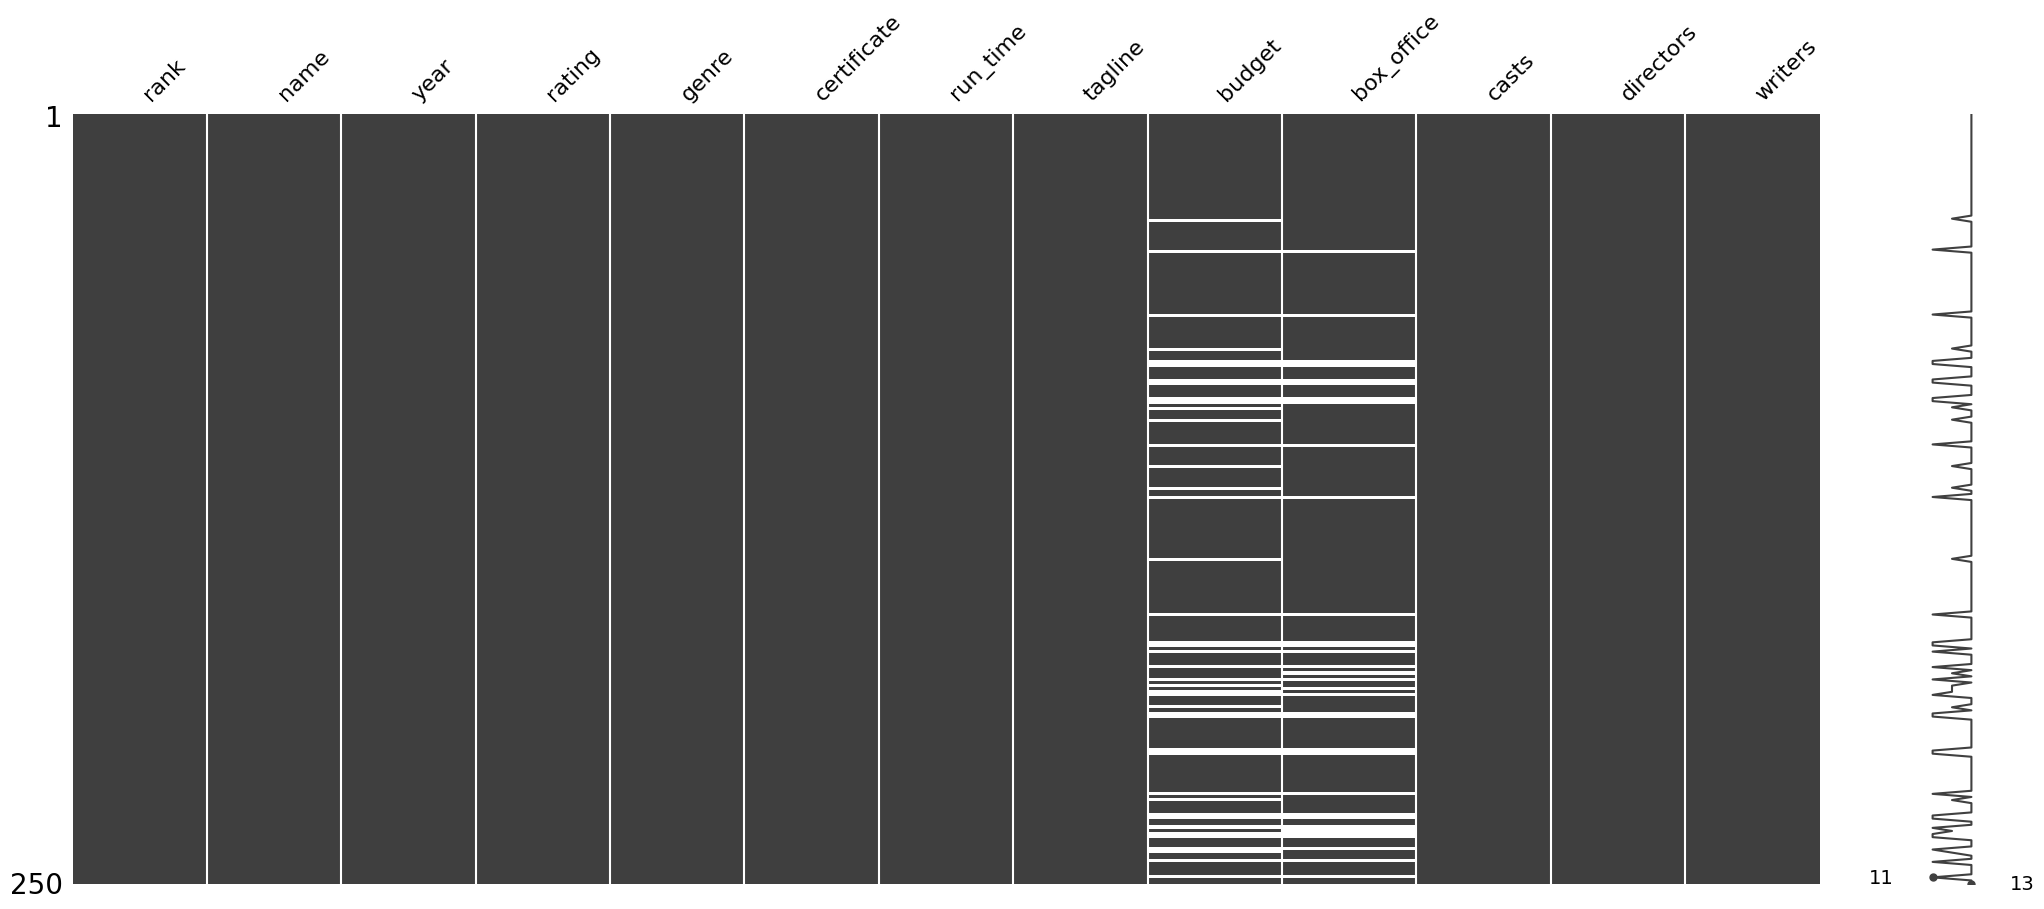

In [154]:
# Visual representation of the missing data in the dataset

missingno.matrix(top_250_movies)

In [155]:
# Impute the missing values

top_250_movies['budget'] = top_250_movies['budget'].fillna(top_250_movies['budget'].median())
top_250_movies['box_office'] = top_250_movies['box_office'].fillna(top_250_movies['box_office'].median())

**To find the highest rated movie**

In [156]:
max_rating = max(top_250_movies['rating'])
highest_rated_movies = top_250_movies[top_250_movies['rating'] == max_rating]
print('Number of highest rated movies = ', len(highest_rated_movies), '\n')
highest_rated_movies

Number of highest rated movies =  1 



,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25.0,28.884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"


In [157]:
highest_rated_movie = top_250_movies.iloc[highest_rated_movies.index].name
highest_rated_movie

0    The Shawshank Redemption
Name: name, dtype: object

**To find the genre that has the highest average rating**

In [158]:
top_250_movies['genre'].value_counts()

Drama                         19
Crime,Drama                   14
Animation,Adventure,Comedy    10
Biography,Drama,History        9
Crime,Drama,Mystery            9
                              ..
Action,Thriller                1
Drama,Mystery,Sci-Fi           1
Comedy,Drama,Family            1
Comedy,Music,Romance           1
Comedy                         1
Name: genre, Length: 104, dtype: int64

In [159]:
# Split the combined genre values into individual genres

genre_list = top_250_movies['genre'].str.split(',')
genre_list

0                             [Drama]
1                      [Crime, Drama]
2              [Action, Crime, Drama]
3                      [Crime, Drama]
4                      [Crime, Drama]
                    ...              
245                           [Drama]
246     [Adventure, Biography, Drama]
247    [Animation, Adventure, Comedy]
248       [Biography, Drama, History]
249       [Adventure, Drama, Western]
Name: genre, Length: 250, dtype: object

In [160]:
# Storing the ratings corresponding to each genre in a dictionary

genre_ratings = defaultdict(list)

for genres, rating in zip(genre_list, top_250_movies['rating']):
  for genre in genres:
    genre_ratings[genre].append(rating)

genre_ratings.items()

dict_items([('Drama', [9.3, 9.2, 9.0, 9.0, 9.0, 9.0, 9.0, 8.9, 8.8, 8.8, 8.8, 8.8, 8.7, 8.7, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.6, 8.5, 8.5, 8.5, 8.5, 8.5, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.3, 8.4, 8.4, 8.4, 8.4, 8.4, 8.3, 8.3, 8.4, 8.4, 8.3, 8.4, 8.4, 8.3, 8.4, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.4, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.2, 8.2, 8.3, 8.3, 8.2, 8.2, 8.3, 8.2, 8.3, 8.2, 8.2, 8.2, 8.3, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.1, 8.2, 8.1, 8.1, 8.2, 8.1, 8.1, 8.1, 8.2, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.2, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.2, 8.2, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.3, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.8, 8.2, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.2, 8.0, 8.0]), ('Crime', [9.2, 9.0, 9.0, 9.0, 8.9, 8.7, 8.6, 8.6, 8.6, 8.6, 8.5, 8.5, 8.5, 8.5, 8.4, 8.4,

In [161]:
# Calculate the average rating for each genre

avg_genre_rating = {k:np.mean(np.array(v)) for k, v in genre_ratings.items()}
avg_genre_rating

{'Drama': 8.320338983050846,
 'Crime': 8.36078431372549,
 'Action': 8.350000000000001,
 'Biography': 8.248275862068963,
 'History': 8.27,
 'Adventure': 8.3,
 'Western': 8.328571428571431,
 'Romance': 8.29565217391304,
 'Sci-Fi': 8.36,
 'Fantasy': 8.307142857142855,
 'Mystery': 8.325806451612902,
 'Family': 8.253846153846153,
 'Thriller': 8.256666666666666,
 'War': 8.291304347826085,
 'Comedy': 8.231111111111112,
 'Animation': 8.256521739130434,
 'Music': 8.399999999999999,
 'Horror': 8.34,
 'Film-Noir': 8.225000000000001,
 'Musical': 8.3,
 'Sport': 8.16}

In [162]:
# Identify the genre with the highest average rating

highest_rated_genre = max(avg_genre_rating, key= lambda x: avg_genre_rating[x])
print(highest_rated_genre, ':\t Average rating =', avg_genre_rating.get(highest_rated_genre))

Music :	 Average rating = 8.399999999999999


**For the movies rated above 8, find the top 5 movie directors based on average ratings**

In [163]:
# Filter the dataset to include only movies rated above 8

above_8_rating_mov = top_250_movies[top_250_movies['rating'] > 8]
print('Dimensions: ', above_8_rating_mov.shape, '\n')
above_8_rating_mov.head()

Dimensions:  (245, 13) 



,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25.00,28.884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6.00,250.341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185.00,1006.234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13.00,47.961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,0.35,0.000955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [164]:
# Find the number of directors in thsi filtered grouping of highly rated movies

len(above_8_rating_mov['directors'].unique())

156

In [165]:
# Group the filtered dataset by directors

grp_by_directors = above_8_rating_mov.groupby('directors')

In [166]:
#Calculate the average rating for each director

average_rating = grp_by_directors['rating'].mean()
average_rating

directors
Aamir Khan,Amole Gupte(uncredited)    8.300000
Adam Elliot                           8.100000
Akira Kurosawa                        8.300000
Alejandro G. Iñárritu                 8.100000
Alfred Hitchcock                      8.316667
                                        ...   
William Friedkin                      8.100000
William Wyler                         8.100000
Wolfgang Petersen                     8.400000
Yasujirô Ozu                          8.200000
Çagan Irmak                           8.200000
Name: rating, Length: 156, dtype: float64

In [167]:
# Sort the directors by average rating in descending order

sorted_directors = average_rating.sort_values(ascending=False)

In [168]:
# Top 5 directors with the highest average ratings

top_5_directors = sorted_directors.head(5)

print("Top 5 Movie Directors Based on average ratings for movies rated above 8:")
top_5_directors

Top 5 Movie Directors Based on average ratings for movies rated above 8:


directors
Frank Darabont                    8.950000
Francis Ford Coppola              8.900000
Peter Jackson                     8.866667
T.J. Gnanavel                     8.800000
Lana Wachowski,Lilly Wachowski    8.700000
Name: rating, dtype: float64

**Study the relationship between the following factors and report any findings through relevant plots**

*   **Rating**
*   **Budget**
*   **Box office**



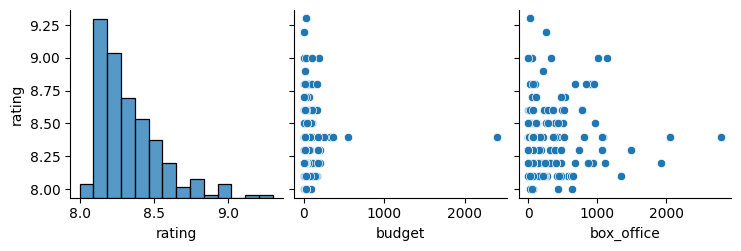

In [169]:
# Correlation using pairplot

movie_relations = top_250_movies.loc[:, top_250_movies.columns.isin(['rating', 'budget', 'box_office'])]

for i in range(0, len(movie_relations.columns),5):
    sns.pairplot(movie_relations, y_vars ='rating', x_vars = movie_relations.columns[i:i+5])



In [174]:
# Rating V/s Budget (Scatter Plot)

px.scatter(top_250_movies, x='rating', y='budget', color='genre', title='Rating V/s Budget', color_discrete_sequence = px.colors.diverging.delta)

**Observation** - Some very highly-rated movies are shown to have been produced on a relatively lower budget. Movies made with over 170 million $ are seen to have been rated lower than or equal to 8.4.



In [176]:
# Rating vs. Box Office (Scatter Plot)

px.scatter(top_250_movies, x='rating', y='box_office', color='genre', title='Rating V/s Box Office', color_discrete_sequence = px.colors.diverging.delta)

**Observation** - Highly-rated movies tend to not earn too well at the box office. Movies with ratings between 8.2-8.6 have shown good box office collections.

In [177]:
# Budget vs. Box Office (Scatter Plot)

px.scatter(top_250_movies, x='budget', y='box_office', color='genre', title='Budget V/s Box Office', color_discrete_sequence = px.colors.diverging.delta)

**Observation** - Higher-budget movies tend to earn more at the box office.

In [186]:
# Heatmap showing Correlation

correlation_matrix = top_250_movies[['rating', 'budget', 'box_office']].corr()

fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto", color_continuous_scale = 'YlGnBu', width=800, height=640)
fig.update_xaxes(side="top")

fig.show()

**Observation** - Rating, Budget and Box office collection are all weakly correlated with each other

**Create a small quiz program where the user can enter the movie title, and get 2-3 questions about the movie as a quiz**

In [194]:
# To check if all the movie name sare unique

any(top_250_movies['name'].value_counts() > 1)

False

**Observation** - There is no repetition in any movie names....therefore, movie name can be a key identifier like a primary key.

In [249]:
def find_movie_index(movie_name):
  return top_250_movies[top_250_movies['name'].str.contains(movie_name) == True].index

def find_release_yr(movie_name):
  movie_idx = find_movie_index(movie_name)
  #return str(int(top_250_movies.loc[movie_idx, 'year']))
  return str((list(top_250_movies.loc[movie_idx, 'year'])[0]))

def find_director(movie_name):
  movie_idx = find_movie_index(movie_name)
  return list(top_250_movies.loc[i, 'directors'])[0]

def find_actors(movie_name):
  movie_idx = find_movie_index(movie_name)
  return set(map(str.lower, list(top_250_movies.loc[i, 'casts'])[0].split(',')))

def find_certificate(movie_name):
  movie_idx = find_movie_index(movie_name)
  return list(top_250_movies.loc[i, 'certificate'])[0]


#question_bank = {0: ['In which year was the movie released?', find_release_yr],
question_bank = {1: ['Who directed this movie?', find_director],
                 2: ['Which actor played a role in this movie', find_actors],
                 3: ['What id the certification of the movie', find_certificate]}


def ask_question(movie_name):
  question_ids = np.random.choice(range(1, 4), 2, replace=False)
  for q_no in question_ids:
    print(question_bank[q_no][0])
    answer = question_bank[q_no][1]('movie')
    user_answer = input().rstrip()

    if q_no == 2:
      if user_answer.lower() in answer:
        print('Correct answer!')
      else:
        print('Wrong answer!')
    else:
      if user_answer.lower() == answer.lower():
        print('Correct answer!')
      else:
        print('Wrong answer!')


def main():
  print('Movie Quiz Time!!')
  while True:
    print('Enter the name of the movie:')
    movie_name = input().rstrip()
    if movie_name.lower() == "exit":
        print("Bye!")
        break
    else:
      ask_question(movie_name)

if __name__ == "__main__":
  main()

Movie Quiz Time!!
Enter the name of the movie:
The Shawshank Redemption
What id the certification of the movie
R
Correct answer!
Who directed this movie?
Frank darabont
Correct answer!
Enter the name of the movie:
The Lord of the Rings: The Fellowship of the Ring
Which actor played a role in this movie
Elijah Wood
Wrong answer!
Who directed this movie?
Peter Jackson
Wrong answer!
Enter the name of the movie:
exit
Bye!


In [188]:
def fn(name):
  print('name = ', name)

question_bank = {0: ['In which year was the movie released?', fn]}
question_bank[0][1]('movie')

name =  movie


In [232]:
i = top_250_movies[top_250_movies['name'].str.contains('The Shawshank Redemption') == True].index
i

Int64Index([0], dtype='int64')

In [233]:
int(top_250_movies.loc[i, 'year'])

1994

In [238]:
type(list(top_250_movies.loc[i, 'year'])[0])

int

In [210]:
list(top_250_movies.loc[i, 'directors'])[0]

'Frank Darabont'

In [226]:
set(map(str.lower, list(top_250_movies.loc[i, 'casts'])[0].split(',')))

{'bob gunton',
 'brian libby',
 'clancy brown',
 'david proval',
 'gil bellows',
 'james whitmore',
 'jeffrey demunn',
 'joseph ragno',
 'jude ciccolella',
 'larry brandenburg',
 'mark rolston',
 'morgan freeman',
 'neil giuntoli',
 'paul mccrane',
 'renee blaine',
 'scott mann',
 'tim robbins',
 'william sadler'}

In [243]:
q = np.random.choice(4, 2, replace=False)
q
for q_no in q:
  print(q_no)

1
3


In [227]:
'1994'.lower()

'1994'